<a href="https://colab.research.google.com/github/sajjad73hajizade/shirazU-learn/blob/main/normalDWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rasterio

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
import rasterio
from osgeo import gdal
from skimage import exposure
from skimage.exposure import match_histograms
# import colorsys
import cv2
import math

In [5]:
#Build ms image
red_band = rasterio.open('L8_30_RED1.tif').read(1)

pan_band = rasterio.open('L8_15_pan.tif').read(1)


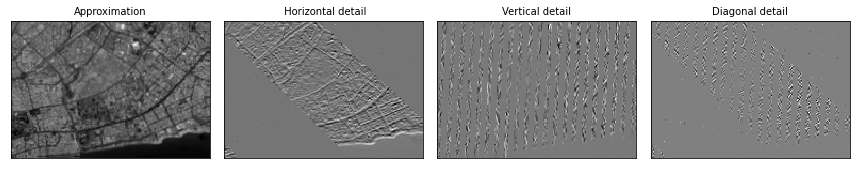

In [6]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(red_band, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])



fig.tight_layout()
plt.show()


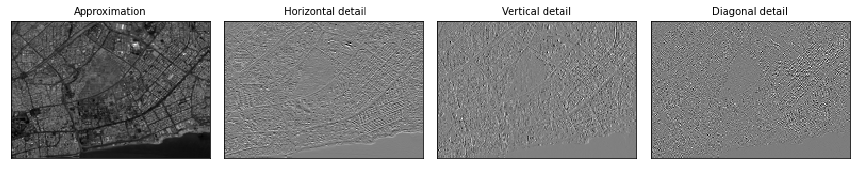

In [7]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs21 = pywt.dwt2(pan_band, 'bior1.3')
LL1, (LH1, HL1, HH1) = coeffs21
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL1, LH1, HL1, HH1]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])



fig.tight_layout()

plt.show()

In [8]:
pan_coe = list(coeffs21)
ms_coe1 = list(coeffs2)
ms_coe1[0] = pan_coe[0]

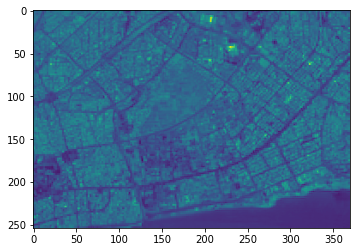

In [9]:
#Invers DWT
fused_image = pywt.idwt2(ms_coe1, 'bior1.3')

plt.imshow(fused_image)
plt.show()

In [11]:
SD = np.std(fused_image)
print(SD)

0.03250981


In [10]:
import tifffile
tifffile.imwrite('fused_image_normal.tif', fused_image)